In [1]:
import numpy as np 
z = np.arange(-10, 10, 0.01)
g = 1/(1+np.exp(-z))

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline 

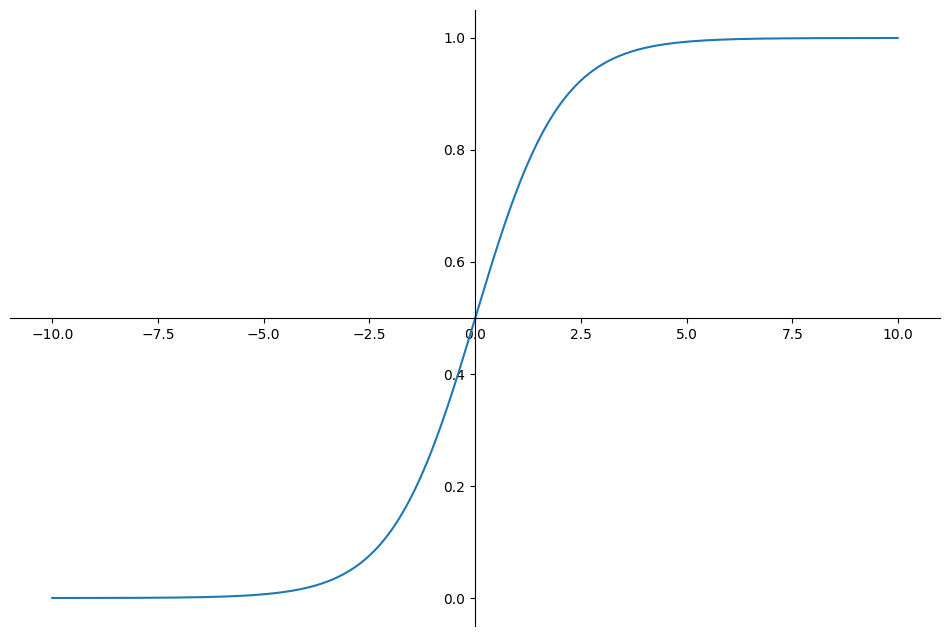

In [6]:
plt.figure(figsize = (12, 8))
ax = plt.gca()

ax.plot(z, g)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
plt.show()

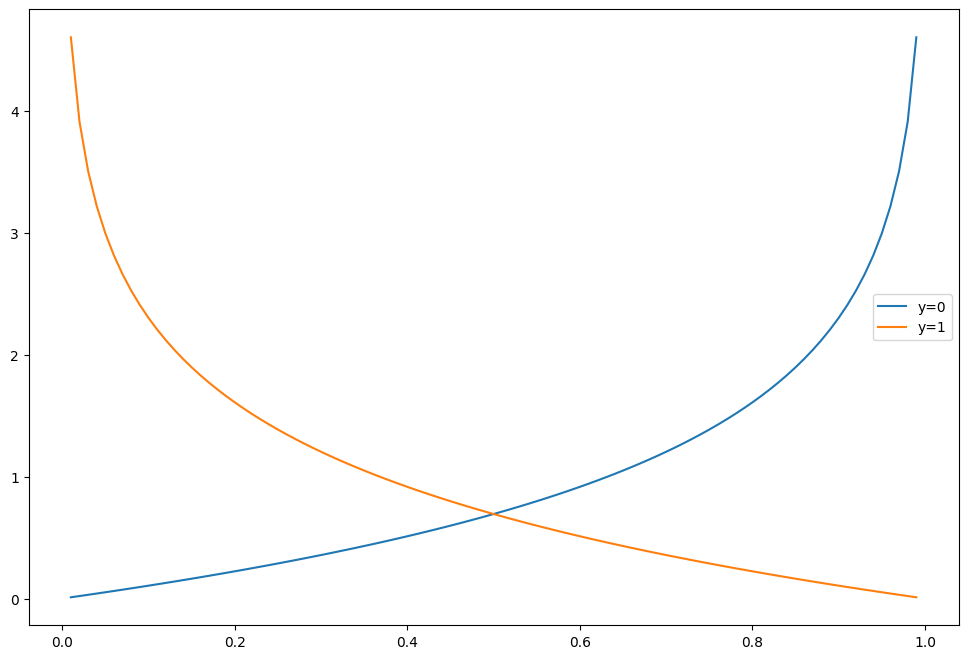

In [7]:
h = np.arange(0.01, 1, 0.01)
c0 = -np.log(1-h)
c1 = -np.log(h)

plt.figure(figsize = (12, 8))
plt.plot(h, c0, label = 'y=0')
plt.plot(h, c1, label = 'y=1')
plt.legend()
plt.show()

In [13]:
import pandas as pd
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
    'master/dataset/wine.csv'
wine = pd.read_csv(wine_url, index_col = 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [14]:
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

In [15]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1.0


In [17]:
X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

In [18]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
lr = LogisticRegression(solver = 'liblinear', random_state = 13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train_acc: ', accuracy_score(y_train, y_pred_tr))
print('Tset_acc: ', accuracy_score(y_test, y_pred_test))

Train_acc:  0.7427361939580527
Tset_acc:  0.7438461538461538


In [21]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 

estimators = [('sclaer', StandardScaler()), 
              ('clf', LogisticRegression(solver = 'liblinear', random_state = 13))]
pipe = Pipeline(estimators)

In [22]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('sclaer', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [24]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)
print('Train acc: ', accuracy_score(y_train, y_pred_tr))
print('Test acc: ', accuracy_score(y_test, y_pred_test))


Train acc:  0.7444679622859341
Test acc:  0.7469230769230769


In [28]:
from sklearn.tree import DecisionTreeClassifier
wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
wine_tree.fit(X_train, y_train)
models ={'logistic regression:':pipe, 'decision tree': wine_tree}

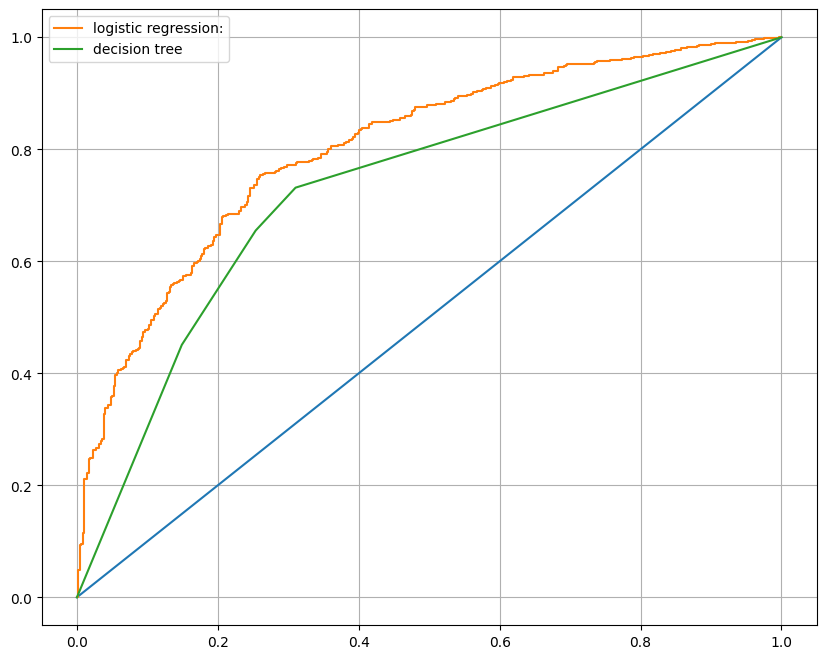

In [29]:
from sklearn.metrics import roc_curve 
plt.figure(figsize = (10, 8))
plt.plot([0, 1], [0, 1])
for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label = model_name)
plt.grid()
plt.legend()
plt.show()    

In [33]:
import pandas as pd 
PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/'+\
                                                        'dataset/diabetes.csv'
PIMA = pd.read_csv(PIMA_url)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


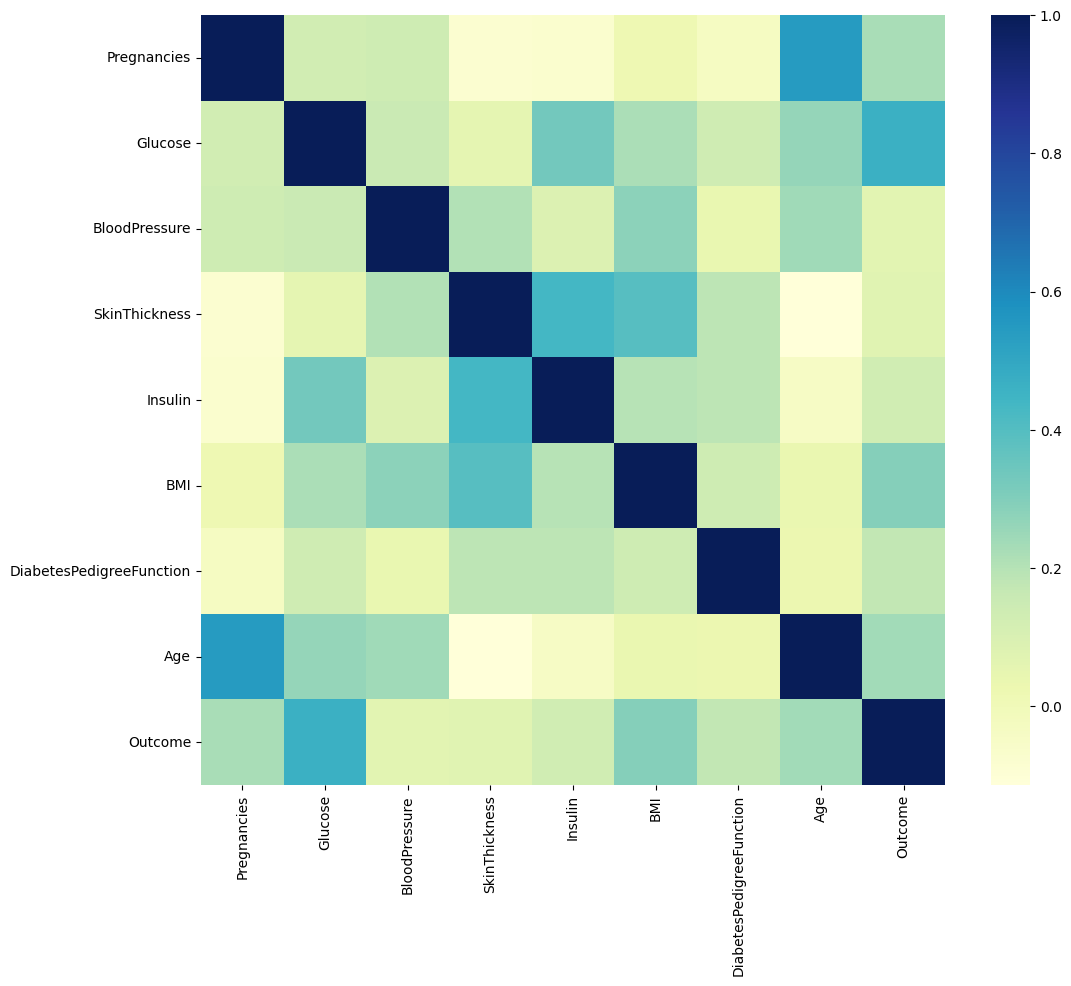

In [41]:
import seaborn as sns   
import matplotlib.pyplot as plt  
%matplotlib inline 

plt.figure(figsize = (12, 10))
sns.heatmap(PIMA.corr(), cmap = 'YlGnBu')
plt.show()

In [42]:
(PIMA == 0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [43]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [44]:
from sklearn.model_selection import train_test_split 

X = PIMA.drop(['Outcome'], axis = 1)
y = PIMA['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13, stratify = y)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [('scaler', StandardScaler()), ('clf', LogisticRegression(solver = 'liblinear', random_state = 13))]
pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [47]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)
print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('AUC score : ', roc_auc_score(y_test, pred))
print('f1 score : ', f1_score(y_test, pred))

Accuracy :  0.7727272727272727
Recall :  0.6111111111111112
Precision :  0.7021276595744681
AUC score :  0.7355555555555556
f1 score :  0.6534653465346535


In [48]:
coeff = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)
coeff

[0.3542658884412648,
 1.2014244425037581,
 -0.15840135536286715,
 0.03394657712929963,
 -0.16286471953988135,
 0.620404521989511,
 0.3666935579557874,
 0.1719596544703511]

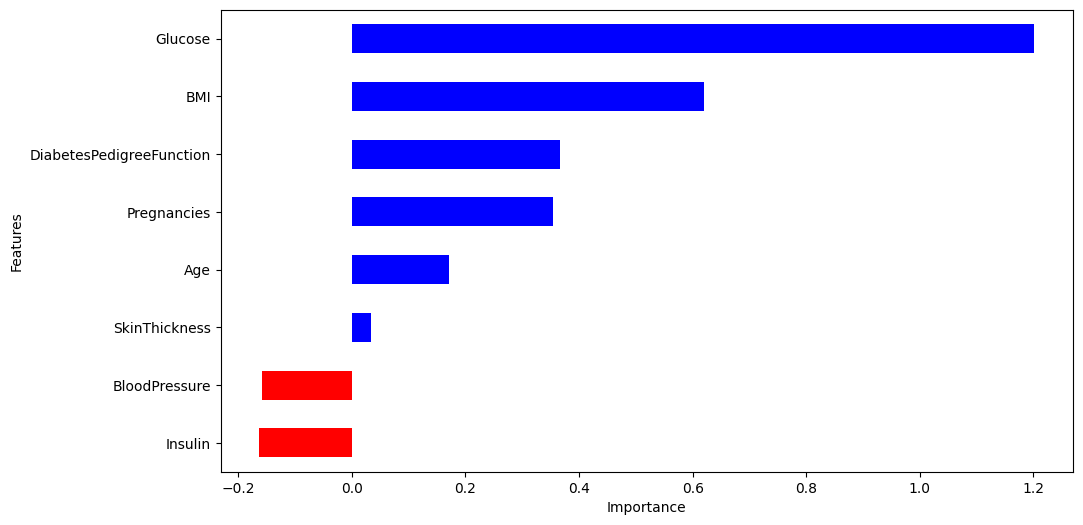

In [49]:
features = pd.DataFrame({'Features': labels, 'importance': coeff})
features.sort_values(by=['importance'], ascending = True, inplace = True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace = True)
features['importance'].plot(kind = 'barh', figsize = (11, 6), color = features['positive'].map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()